In [1]:
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
pp = pprint.PrettyPrinter(indent=4)

In [6]:
df = pd.read_pickle('pickle/df.pkl')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9128 entries, 0 to 9127
Data columns (total 51 columns):
cow_code                          9128 non-null int64
state_name                        9128 non-null object
year                              9128 non-null int64
num_trade_states                  8902 non-null float64
export_dollars                    8619 non-null float64
import_dollars                    8605 non-null float64
military_expenditure              8373 non-null float64
military_personnel                8769 non-null float64
prim_energy_consumption           8857 non-null float64
total_pop                         8906 non-null float64
cinc_score                        8906 non-null float64
num_alliances                     9128 non-null float64
pre_1816_alliances                9128 non-null float64
num_in_effect_1231_2012           9128 non-null float64
defense_treaties                  9128 non-null float64
neutrality_treaties               9128 non-null float64
no

In [8]:
# impute for total non-religious
# do any other religion values not make sense as 0?
# use threshold for first non-zero
# maybe a relevant 0 is any 0 followed by a number greater than 10,000?

In [9]:
len(df.columns)

51

In [10]:
df.columns

Index(['cow_code', 'state_name', 'year', 'num_trade_states', 'export_dollars',
       'import_dollars', 'military_expenditure', 'military_personnel',
       'prim_energy_consumption', 'total_pop', 'cinc_score', 'num_alliances',
       'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
       'neutrality_treaties', 'nonaggression_treaties', 'entente_treaties',
       'num_conflicts', 'avg_cum_duration', 'num_wars', 'ongoing_2010',
       'revision_pct', 'avg_hostility_level', 'majority_religion', 'un_region',
       'un_continent', 'election_type', 'legislation_type',
       'legislature_status', 'party_legal_status', 'party_existance',
       'party_existance_outside_regime', 'legislature_parties',
       'incumbent_type', 'collective_leadership', 'num_leadership_changes',
       'leader_tenure', 'military_leader', 'royal_leader',
       'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
       'democratic_regime', 'cabinet_assembly', 'popular_election',
      

In [11]:
for year in df['year'].unique():
    if df[df['year'] == year]['cow_code'].value_counts().values[0] > 1:
        print(year)

1980
1995
1996
1997
2001
2007
2008


In [12]:
df.drop(3890, inplace = True)
df.drop(6619, inplace = True)
df.drop(6638, inplace = True)
df.drop(6926, inplace = True)
df.drop(7596, inplace = True)
df.drop(8783, inplace = True)
df.drop(8886, inplace = True)
df.drop(8838, inplace = True)
df.drop(8890, inplace = True)
df.drop(9092, inplace = True)
df.drop(8964, inplace = True)
df.drop(8945, inplace = True)
df.drop(9033, inplace = True)

df = df.reset_index()
df.drop(['index'], axis = 1, inplace = True)

In [13]:
for year in df['year'].unique():
    if df[df['year'] == year]['cow_code'].value_counts().values[0] > 1:
        print(year)

In [14]:
df.loc[df['military_personnel'] == 0, 'military_personnel'] = None
df.loc[df['prim_energy_consumption'] == 0, 'prim_energy_consumption'] = None
df.loc[df['export_dollars'] < 1000, 'export_dollars'] = None
df.loc[df['import_dollars'] < 1000, 'import_dollars'] = None

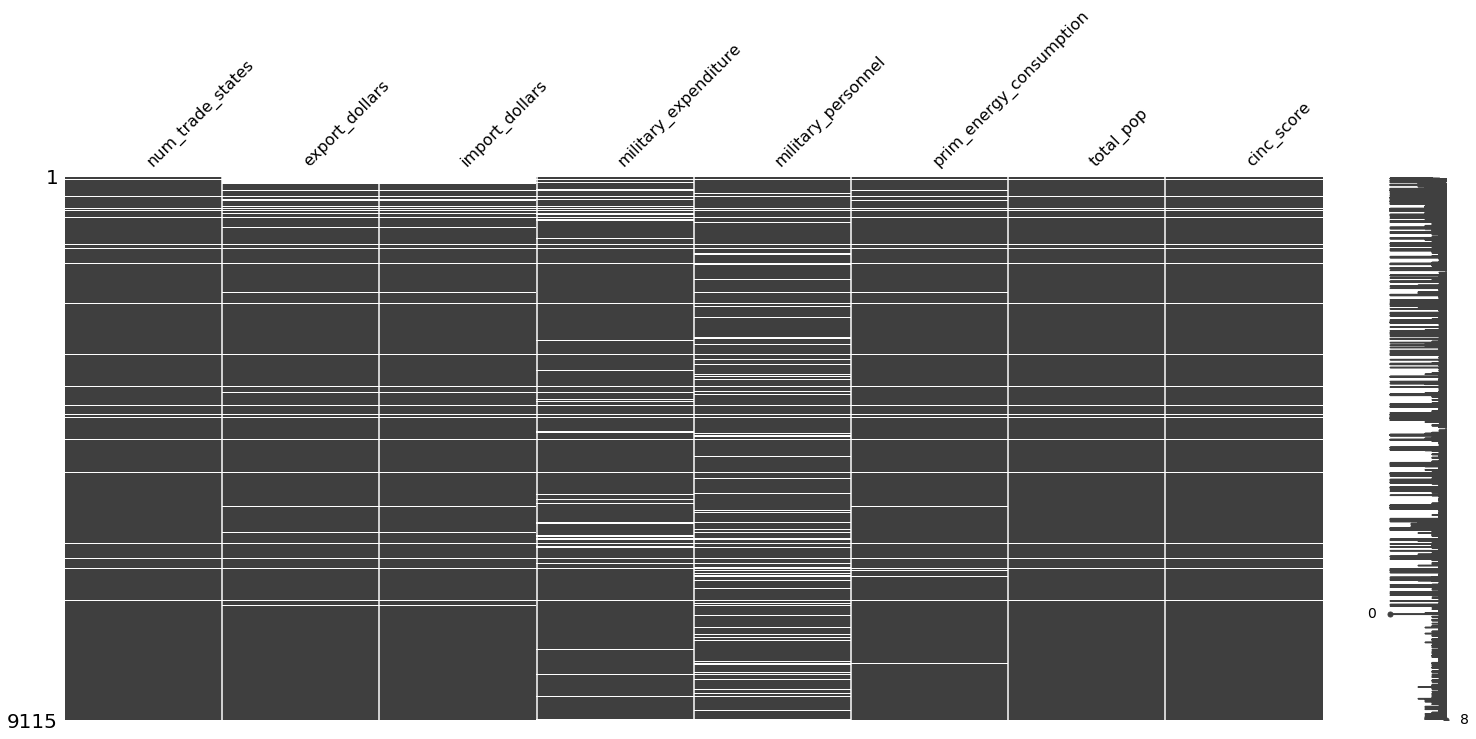

In [16]:
msno.matrix(df.drop(['cow_code', 'state_name', 'year', 'num_alliances',
                     'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
                     'neutrality_treaties', 'nonaggression_treaties',
                     'entente_treaties', 'num_conflicts', 'avg_cum_duration',
                     'num_wars', 'ongoing_2010', 'revision_pct', 'avg_hostility_level',
                     'majority_religion', 'un_continent', 'un_region', 'election_type',
                     'legislation_type', 'legislature_status', 'party_legal_status',
                     'party_existance', 'party_existance_outside_regime', 'legislature_parties',
                     'incumbent_type', 'collective_leadership', 'num_leadership_changes',
                     'leader_tenure', 'military_leader', 'royal_leader',
                     'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
                     'democratic_regime', 'cabinet_assembly', 'popular_election',
                     'regime_type', 'transition_to_democracy', 'transition_to_dictatorship',
                     'age_govt', 'num_transitions_ever'], axis = 1));

In [17]:
column_list = ['num_trade_states', 'prim_energy_consumption',
               'total_pop', 'cinc_score', 'military_personnel',
               'export_dollars', 'import_dollars', 'military_expenditure']
cubic_list = ['export_dollars', 'import_dollars', 'military_expenditure']

In [18]:
for c_code in df['cow_code'].unique():
    for column in column_list:
        data_list = list(df[df['cow_code'] == c_code][column].values)
        if str(data_list).count('nan') == len(data_list):
            df.loc[df['cow_code'] == c_code, column] = 0
        elif column not in cubic_list and str(data_list).count('nan') <= len(data_list) - 2:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].interpolate()
        elif column in cubic_list and str(data_list).count('nan') <= len(data_list) - 2:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].interpolate(method='cubic')
        data_list = list(df[df['cow_code'] == c_code][column].values)
        if str(data_list).count('nan') <= len(data_list) - 1:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].bfill()            
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].ffill()            

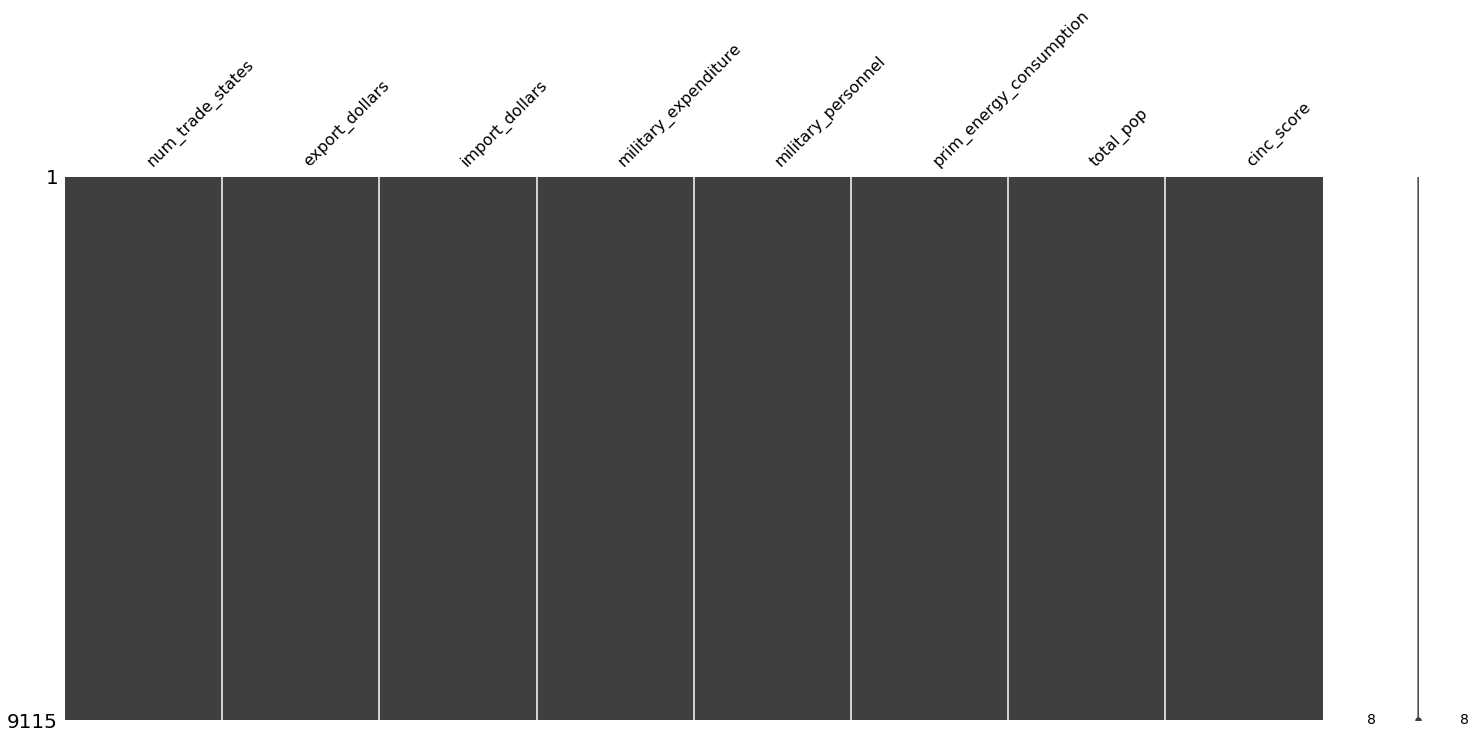

In [19]:
msno.matrix(df.drop(['cow_code', 'state_name', 'year', 'num_alliances',
                     'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
                     'neutrality_treaties', 'nonaggression_treaties',
                     'entente_treaties', 'num_conflicts', 'avg_cum_duration',
                     'num_wars', 'ongoing_2010', 'revision_pct', 'avg_hostility_level',
                     'majority_religion', 'un_continent', 'un_region', 'election_type',
                     'legislation_type', 'legislature_status', 'party_legal_status',
                     'party_existance', 'party_existance_outside_regime', 'legislature_parties',
                     'incumbent_type', 'collective_leadership', 'num_leadership_changes',
                     'leader_tenure', 'military_leader', 'royal_leader',
                     'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
                     'democratic_regime', 'cabinet_assembly', 'popular_election',
                     'regime_type', 'transition_to_democracy', 'transition_to_dictatorship',
                     'age_govt', 'num_transitions_ever'], axis = 1));

In [20]:
df['export_import_ratio'] = df['export_dollars']/df['import_dollars']

In [21]:
df.loc[df['export_import_ratio'].isnull(), 'export_import_ratio'] = 0

In [22]:
df.columns

Index(['cow_code', 'state_name', 'year', 'num_trade_states', 'export_dollars',
       'import_dollars', 'military_expenditure', 'military_personnel',
       'prim_energy_consumption', 'total_pop', 'cinc_score', 'num_alliances',
       'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
       'neutrality_treaties', 'nonaggression_treaties', 'entente_treaties',
       'num_conflicts', 'avg_cum_duration', 'num_wars', 'ongoing_2010',
       'revision_pct', 'avg_hostility_level', 'majority_religion', 'un_region',
       'un_continent', 'election_type', 'legislation_type',
       'legislature_status', 'party_legal_status', 'party_existance',
       'party_existance_outside_regime', 'legislature_parties',
       'incumbent_type', 'collective_leadership', 'num_leadership_changes',
       'leader_tenure', 'military_leader', 'royal_leader',
       'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
       'democratic_regime', 'cabinet_assembly', 'popular_election',
      

In [23]:
df.head()

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,majority_religion,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever,export_import_ratio
0,2,United States of America,1946,65.00,160000000.00,11343750000.00,45133984000.00,3030000.00,2376288000000.00,141389000.00,0.36,19.00,0.00,0.00,19.00,0.00,0.00,19.00,2.00,0.27,0.00,0.00,0.00,3.50,Christianity,Northern America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0,2,Yes,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,77.00,0,0.01
1,651,Egypt,1946,65.00,603500000.00,580390000.00,31998000.00,50000.00,4046000000.00,18792000.00,0.01,7.00,0.00,0.00,0.00,0.00,6.00,7.00,0.00,0.00,0.00,0.00,0.00,1.00,Islam,Northern Africa,Africa,Nonelective,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0,11,No,Yes,No,No,No,No,No,No,Royal dictatorship,No,No,25.00,0,1.04
2,135,Peru,1946,65.00,163700000.00,175990000.00,26446000.00,38000.00,2166000000.00,7420000.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,South America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0,2,No,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,8.00,0,0.93
3,652,Syria,1946,65.00,150000000.00,43680000.00,14540000.00,10000.00,10000000.00,2978000.00,0.00,6.00,0.00,4.00,0.00,0.00,6.00,6.00,0.00,0.00,0.00,0.00,0.00,1.00,Islam,Western Asia,Asia,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,0,4,No,No,No,No,No,No,No,No,Civilian dictatorship,No,No,1.00,0,3.43
4,660,Lebanon,1946,65.00,147799999.90,30600000.00,5111000.00,4000.00,16000000.00,1156000.00,0.00,6.00,0.00,4.00,0.00,0.00,6.00,6.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,Western Asia,Asia,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties,Legislature with multiple parties,Democratic incumbent,No,2,1,No,No,No,No,No,Yes,No,No,Parliamentary democracy,Yes,No,1.00,0,4.83


In [24]:
df.to_pickle('pickle/df_imputed.pkl')
df.to_csv('dataframe_exports/df_imputed.csv')

In [25]:
df = pd.read_pickle('pickle/df_imputed.pkl')